# COVID-19 Restrictions Start 

Explore the impact of COVID-19 restrictions on Mental Health related searches by forecasting searches with COVID-19 Restrictions as Exogenous features and without Exogenous features and comparing MSE.

In [1]:
import matplotlib.pyplot as plt
import functions
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

---

In [2]:
# We are looking at the begining of the pandemic
period = '2020-05-30'

# Number of weeks to predict
steps = 7

# Recursive multi-step forecasting with exogenous variables 

## Forecasting Most Restricted 

### with Exogenous Variables 


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 55.11 



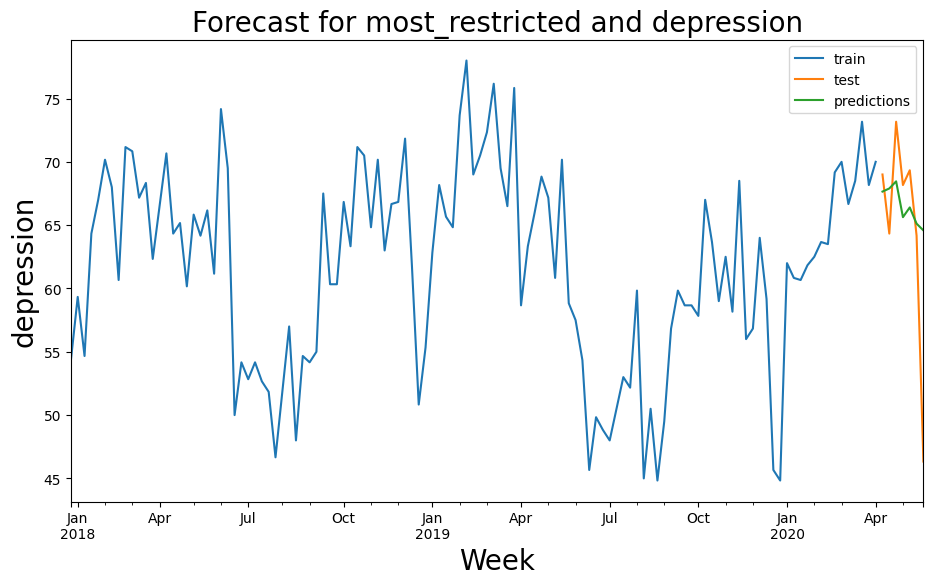


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 3.95 



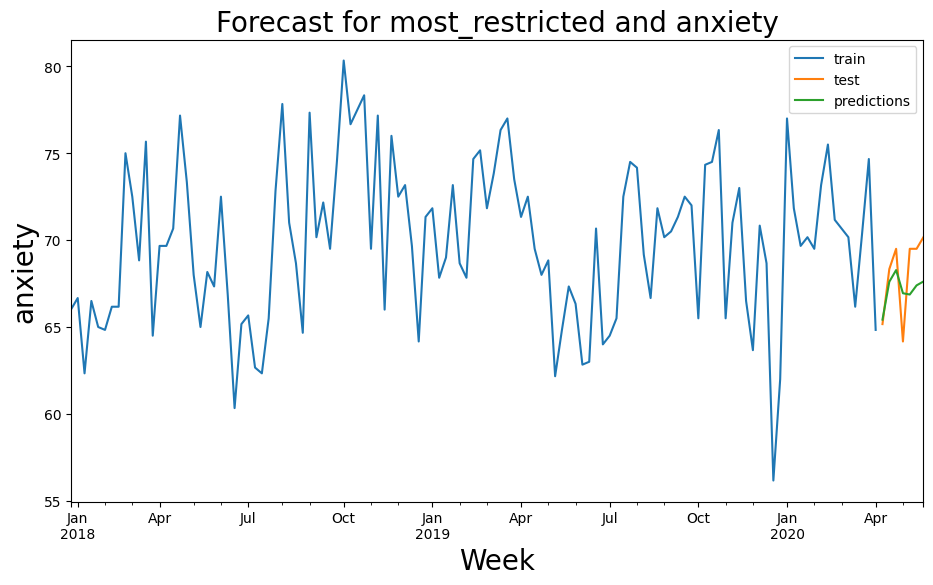


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 35.97 



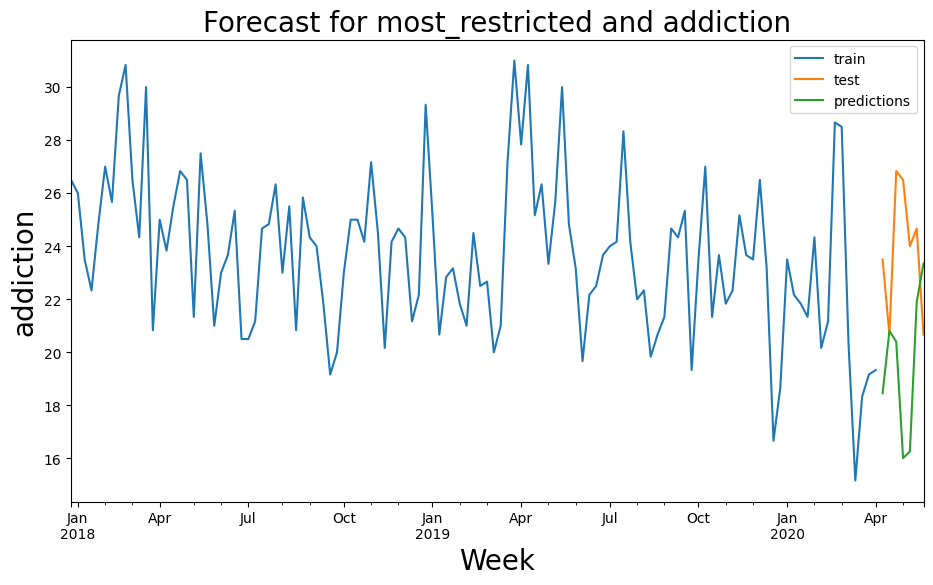


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 42.62 



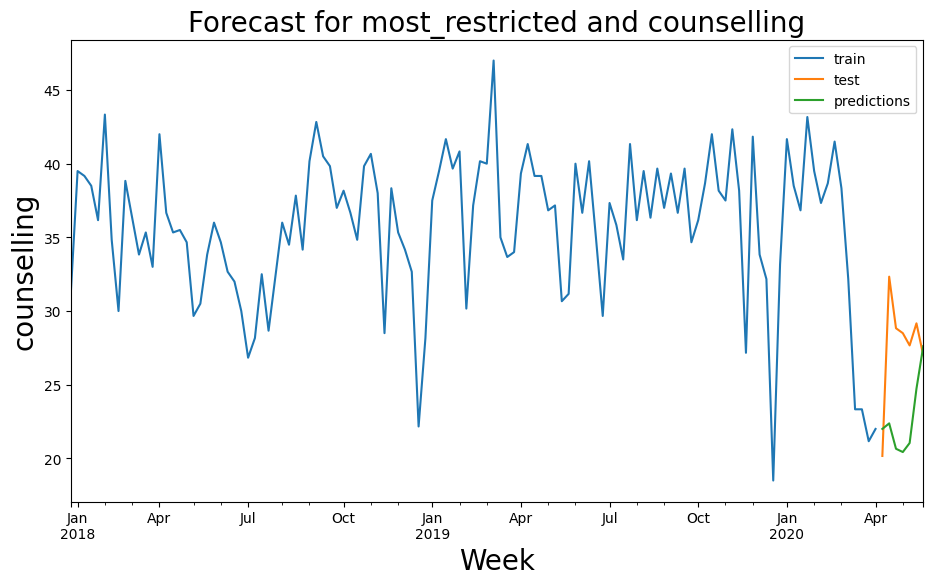


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 43.94 



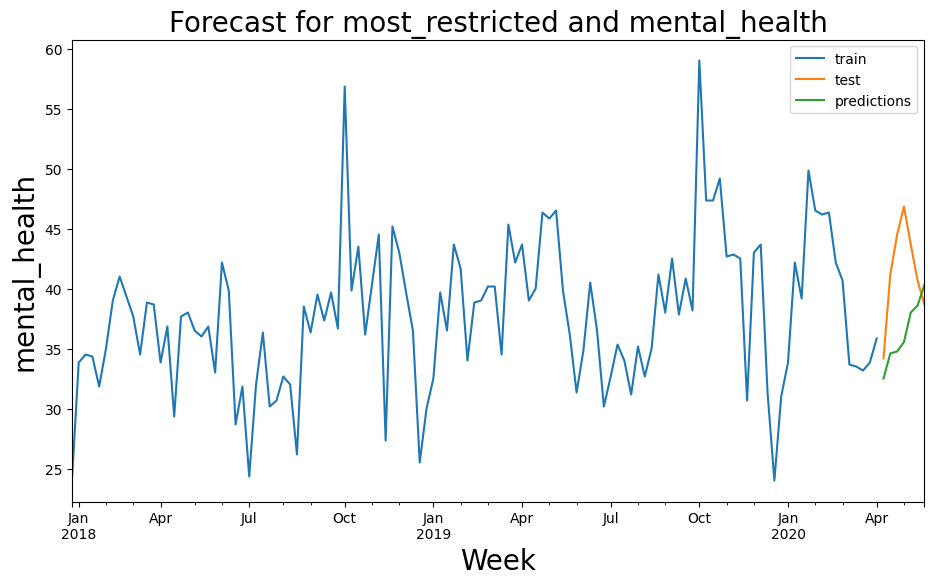

In [3]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

MSE of all my models is lower than 100 and it is a good result we tried hyperparameter tuning, but it did not improve the MSE. 

### without Exogenous Variables 

In [4]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_most[search] = mse


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 49.72 


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 3.16 


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 16.33 


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 66.09 


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 48.01 



In [5]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_most = functions.dict_diff(fa_mse_dic_most)
print(rf_diff_most)

{'depression': 5.39, 'anxiety': 0.79, 'addiction': 19.64, 'counselling': -23.47, 'mental_health': -4.07}


For Most restricted states Counseling searches, MSE reduced from adding exogenous features. Depression, Anxiety, and Mental health MSE stayed about the same with and without Exoginous features. Addiction had better MSE without exogenous features.

---

## Forecasting Least Restricted 

###  with Exogenous Variables 


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 38.38 



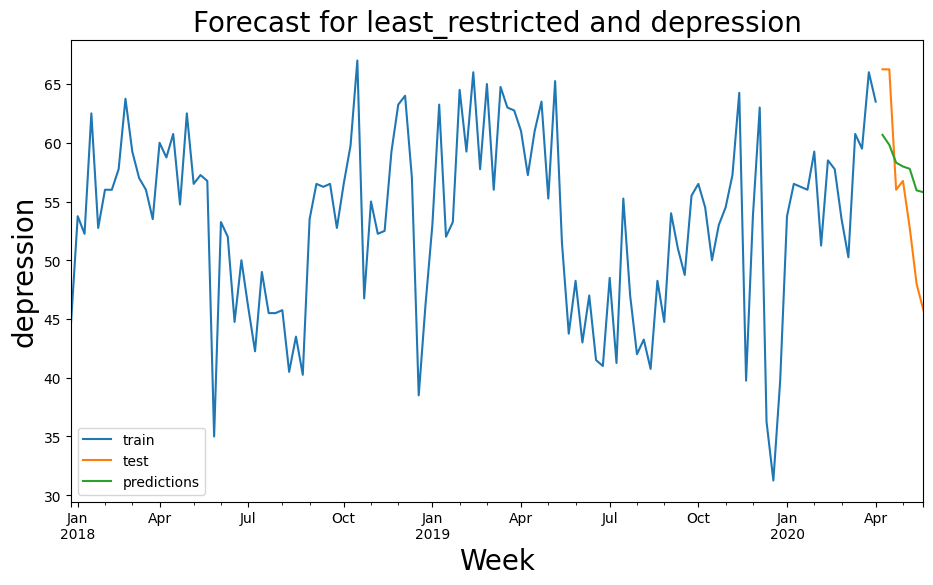


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 23.9 



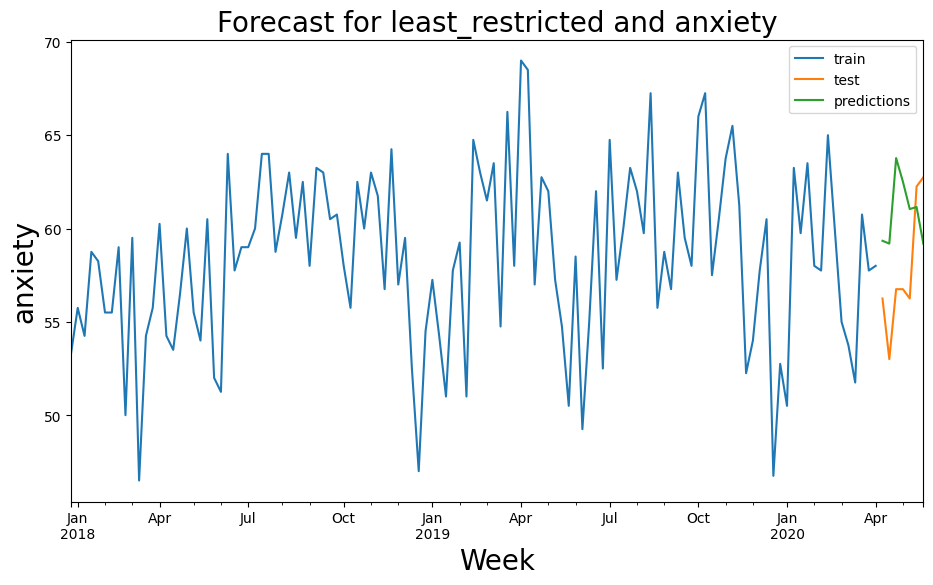


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 11.26 



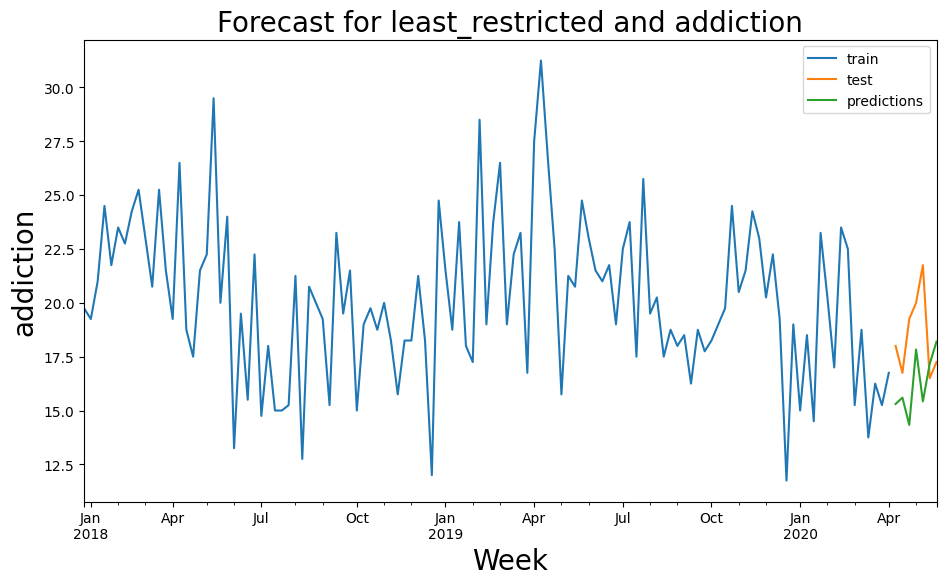


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 12.6 



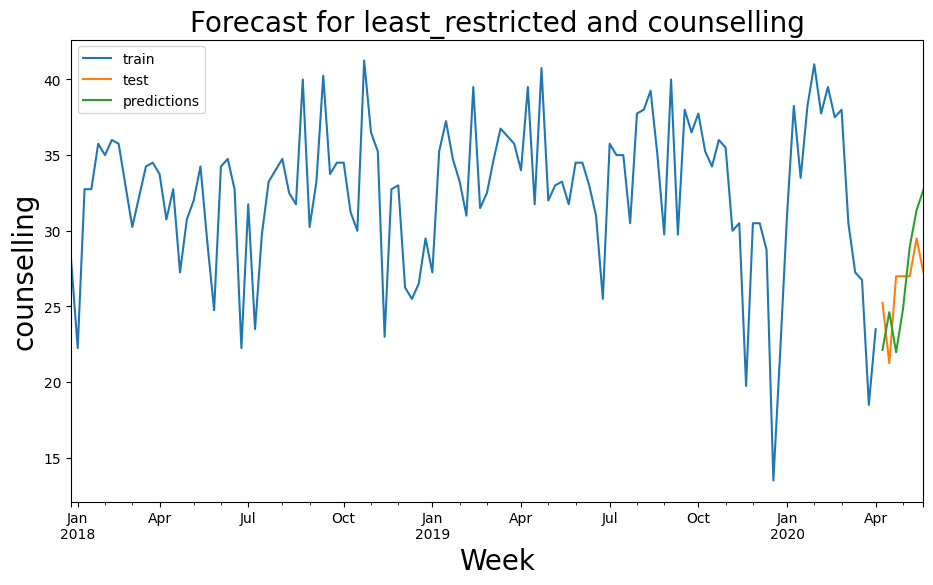


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 5.75 



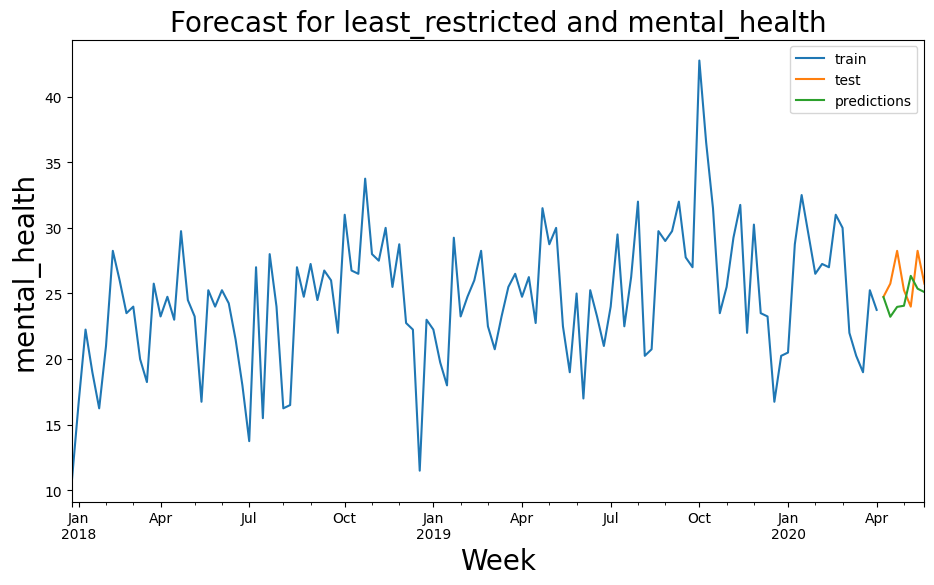

In [6]:
fa_mse_dic_least = {}
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_least[f'{search}_ex'] = mse

MSE of all my models is lower than 100 and it is a good result we tried hyperparameter tuning, but it did not improve the MSE. 

### without Exogenous Variables 

In [7]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_least[search] = mse


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 31.94 


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 18.4 


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 6.01 


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 39.24 


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 6.39 



In [8]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(fa_mse_dic_least)
print(rf_diff_least)

{'depression': 16.07, 'anxiety': 29.61, 'addiction': 42.0, 'counselling': 8.77, 'mental_health': 41.62}


For Least restricted states all MSE scores were better without Exogenous Features.

---

# SARIMAX

## Most Restricted Forecasting for start of COVID-19 pandemic 

### with Exogenous Variables 


 Forecast for most_restricted and depression untill 2020-05-30 

MSE
100.63


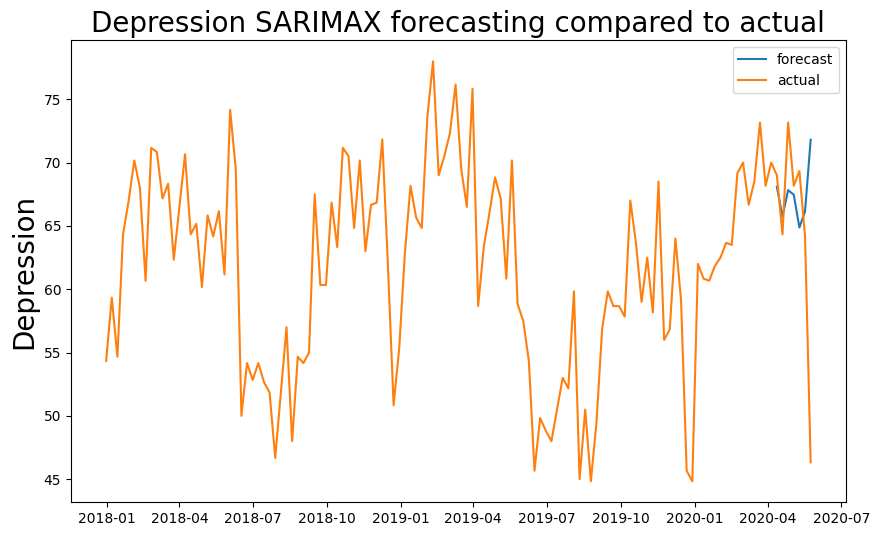


 Forecast for most_restricted and anxiety untill 2020-05-30 

MSE
9.31


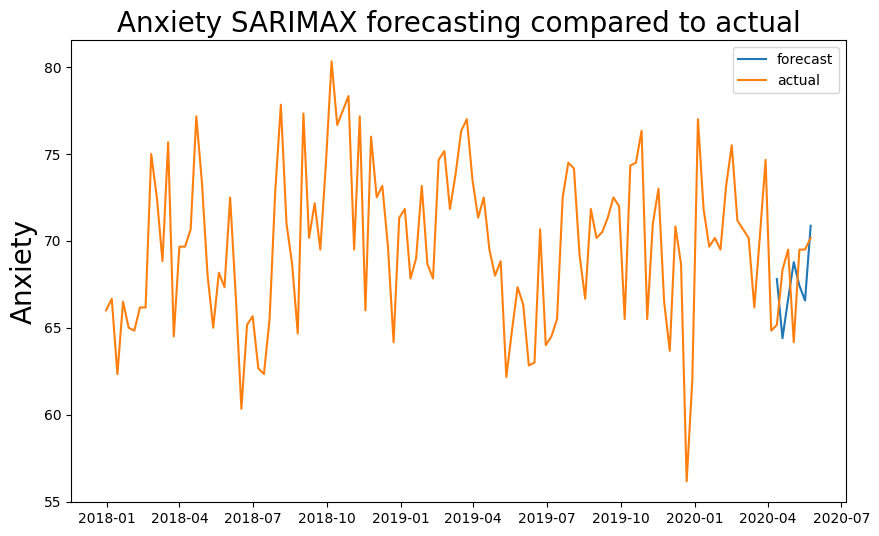


 Forecast for most_restricted and addiction untill 2020-05-30 

MSE
31.73


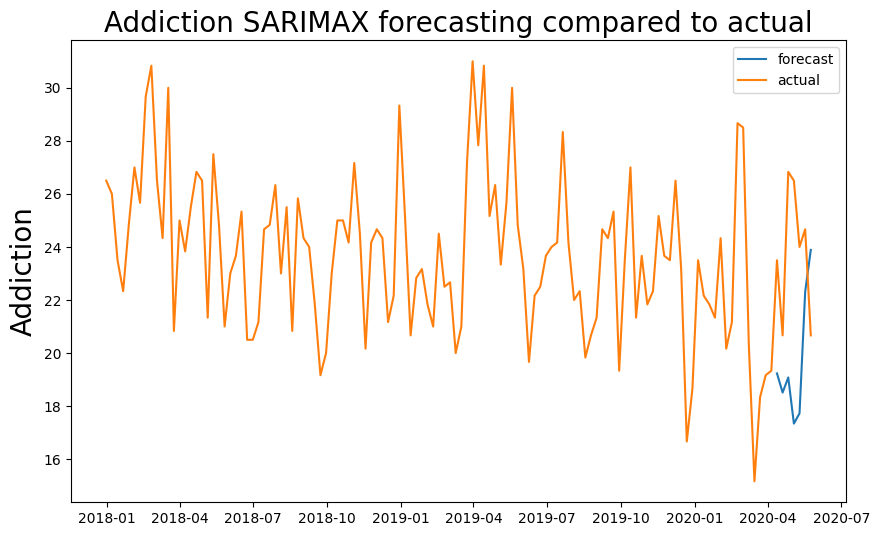


 Forecast for most_restricted and counselling untill 2020-05-30 

MSE
34.06


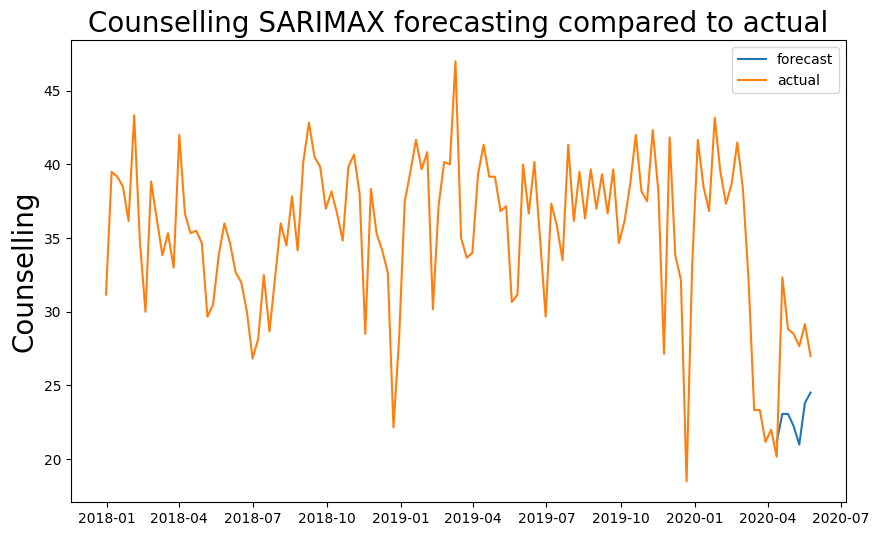


 Forecast for most_restricted and mental_health untill 2020-05-30 

MSE
82.78


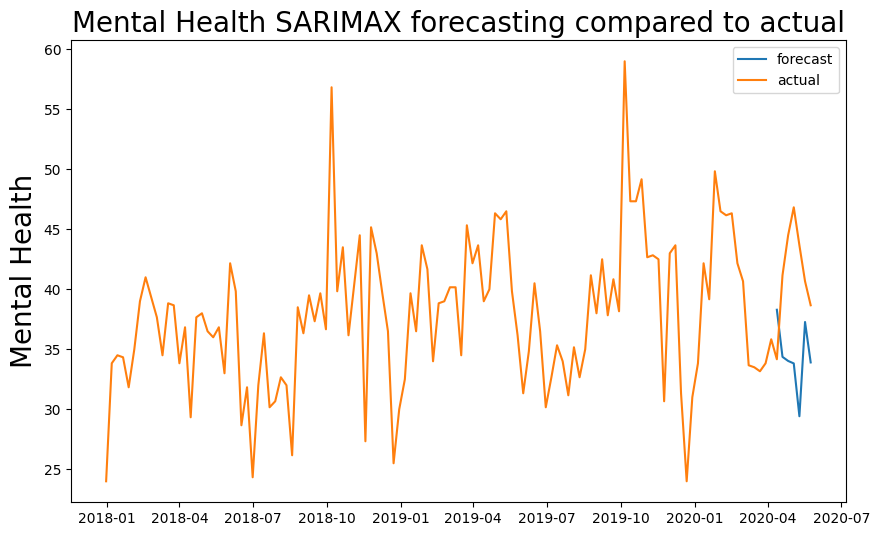

In [9]:
mse_dic_most = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=True)
    mse_dic_most[f'{search}_ex'] = mse
    plt.show()

Overall MSE is higher for SARIMAX models than for Recursive multi-step forecasting, We have tried to grid search hyperparameters, but it didn to improve the scores.

### without Exogenous Variables 

In [10]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_most[search] = mse
    plt.show()


 Forecast for most_restricted and depression untill 2020-05-30 

MSE
77.57

 Forecast for most_restricted and anxiety untill 2020-05-30 

MSE
9.32

 Forecast for most_restricted and addiction untill 2020-05-30 

MSE
15.19

 Forecast for most_restricted and counselling untill 2020-05-30 

MSE
45.31

 Forecast for most_restricted and mental_health untill 2020-05-30 

MSE
29.6


In [11]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_most = functions.dict_diff(mse_dic_most)
print(sarima_diff_most)

{'depression': 23.06, 'anxiety': -0.01, 'addiction': 16.54, 'counselling': -11.25, 'mental_health': 53.18}


For Most Restricted states forecasting with SARIMAX, only counseling benefitted from adding Exogenous features.

---

## Least Restricted Forecasting for start of COVID-19 pandemic 

### with Exogenous Variables 


 Forecast for least_restricted and depression untill 2020-05-30 

MSE
90.63


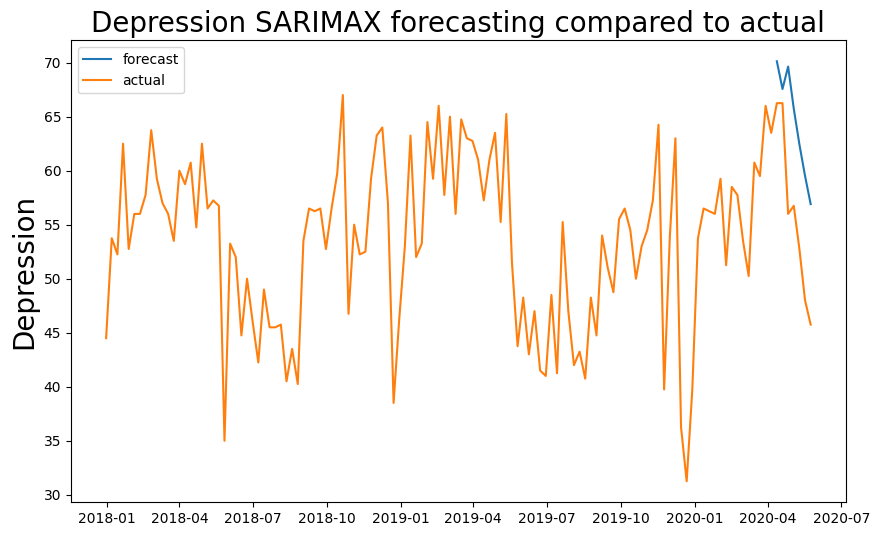


 Forecast for least_restricted and anxiety untill 2020-05-30 

MSE
14.9


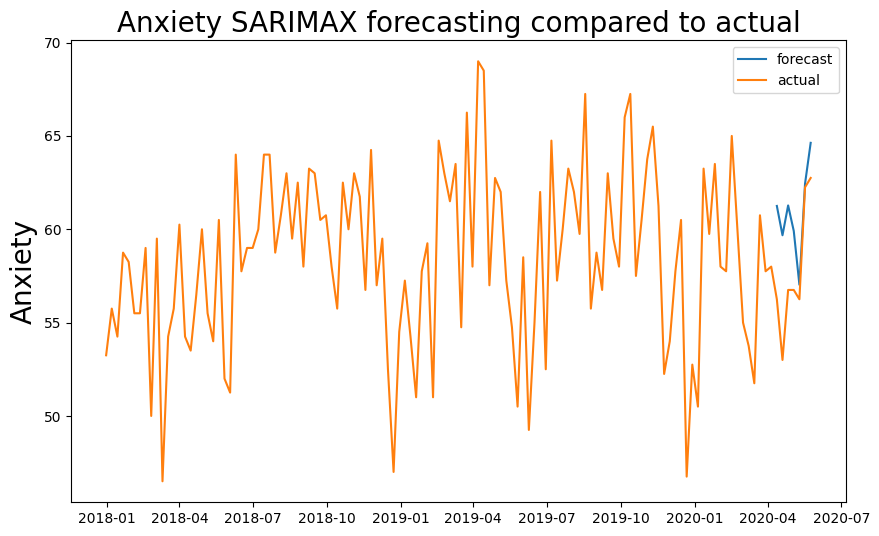


 Forecast for least_restricted and addiction untill 2020-05-30 

MSE
7.74


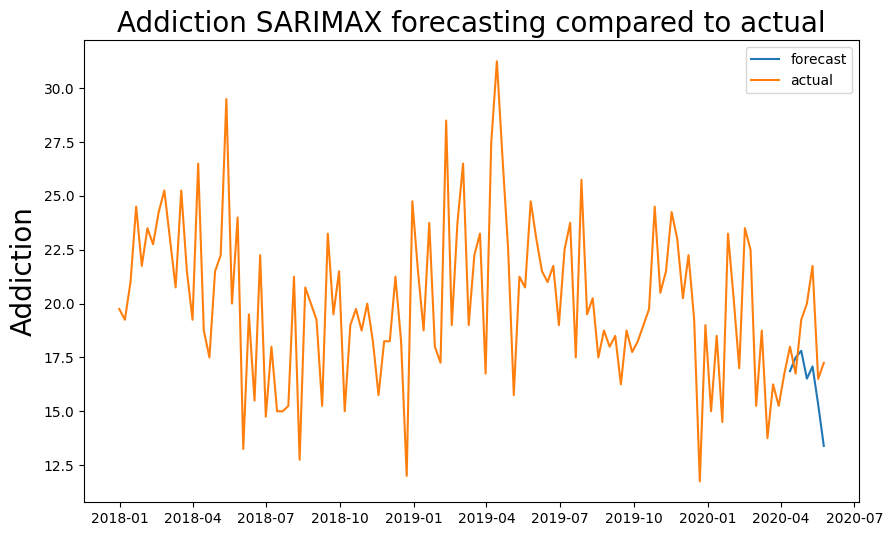


 Forecast for least_restricted and counselling untill 2020-05-30 

MSE
54.1


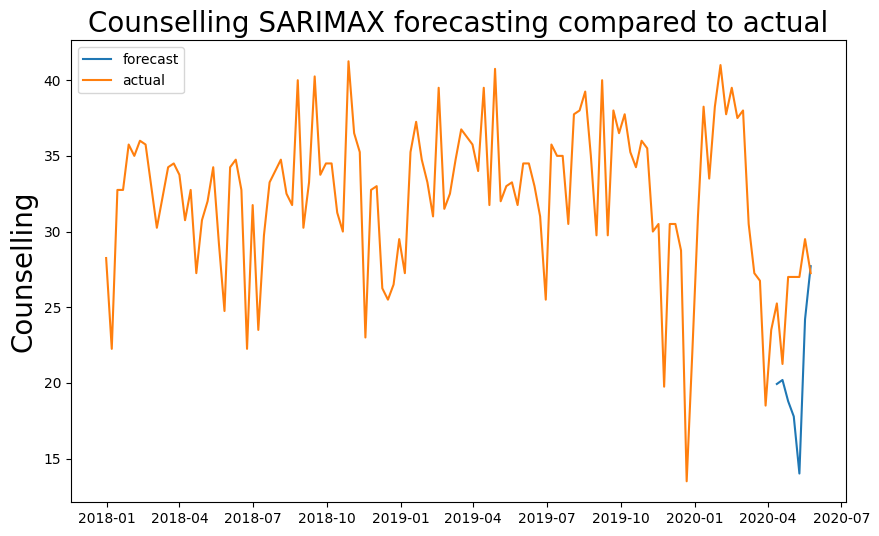


 Forecast for least_restricted and mental_health untill 2020-05-30 

MSE
63.17


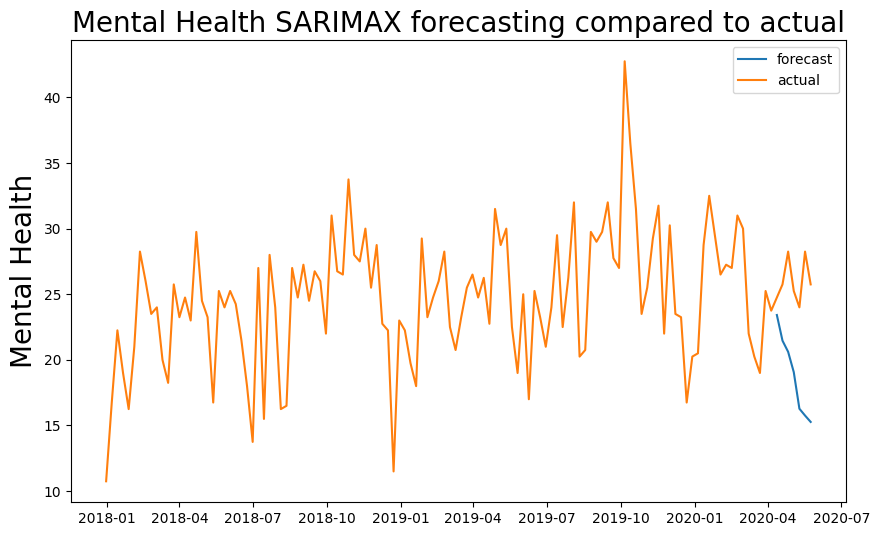

In [12]:
mse_dic_least = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='least_restricted', period='2020-05-30', steps=steps, search=search, plot=True)
    mse_dic_least[f'{search}_ex'] = mse
    plt.show()

### without Exogenous Variables 

In [13]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_least[search] = mse
    plt.show()


 Forecast for least_restricted and depression untill 2020-05-30 

MSE
103.41

 Forecast for least_restricted and anxiety untill 2020-05-30 

MSE
12.84

 Forecast for least_restricted and addiction untill 2020-05-30 

MSE
3.52

 Forecast for least_restricted and counselling untill 2020-05-30 

MSE
37.93

 Forecast for least_restricted and mental_health untill 2020-05-30 

MSE
3.37


In [14]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_least = functions.dict_diff(mse_dic_least)
print(sarima_diff_least)

{'depression': -12.78, 'anxiety': 2.06, 'addiction': 4.22, 'counselling': 16.17, 'mental_health': 59.8}


For Least Restricted states only Depression benefited from adding exogenous features

---

## Plot the MSE differences for Most and Least restricted states with and without egogenous features

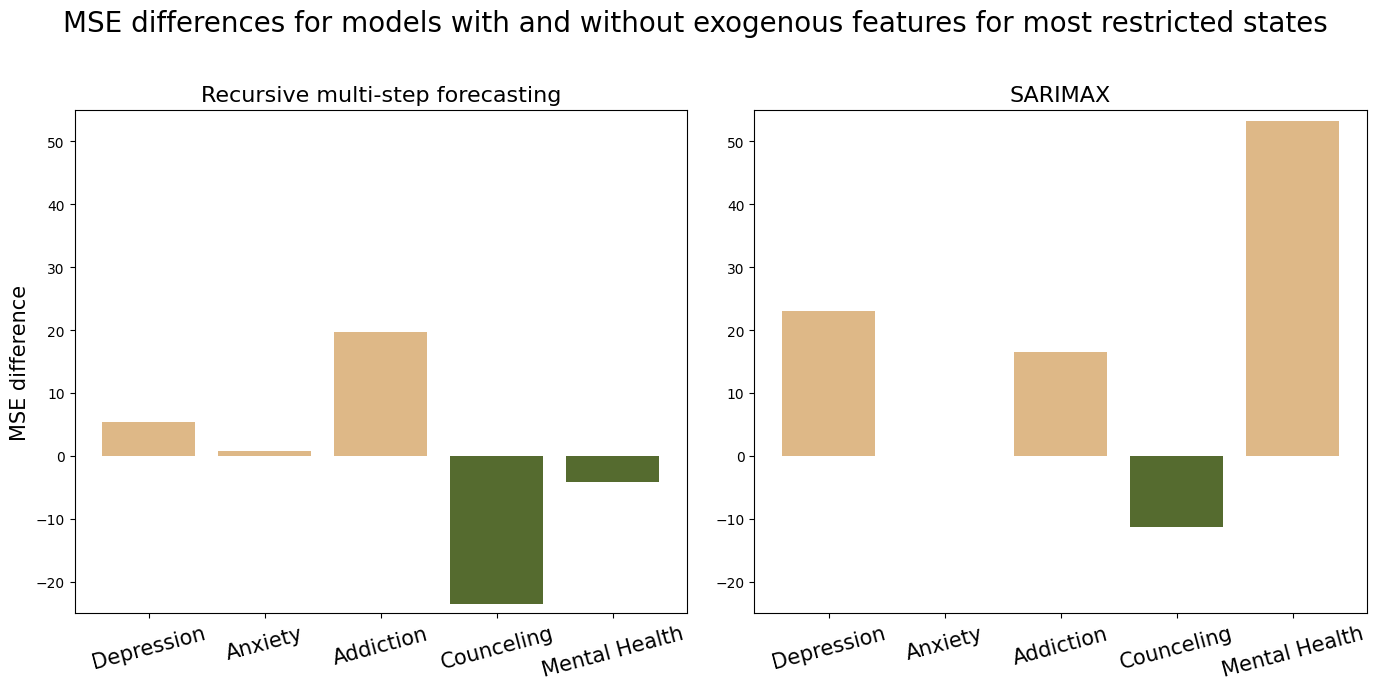

In [15]:
# Differences for most restricted states
functions.plot_MSE_difference(rf_diff_most, sarima_diff_most, 'most', period=period, ylim = [-25, 55])

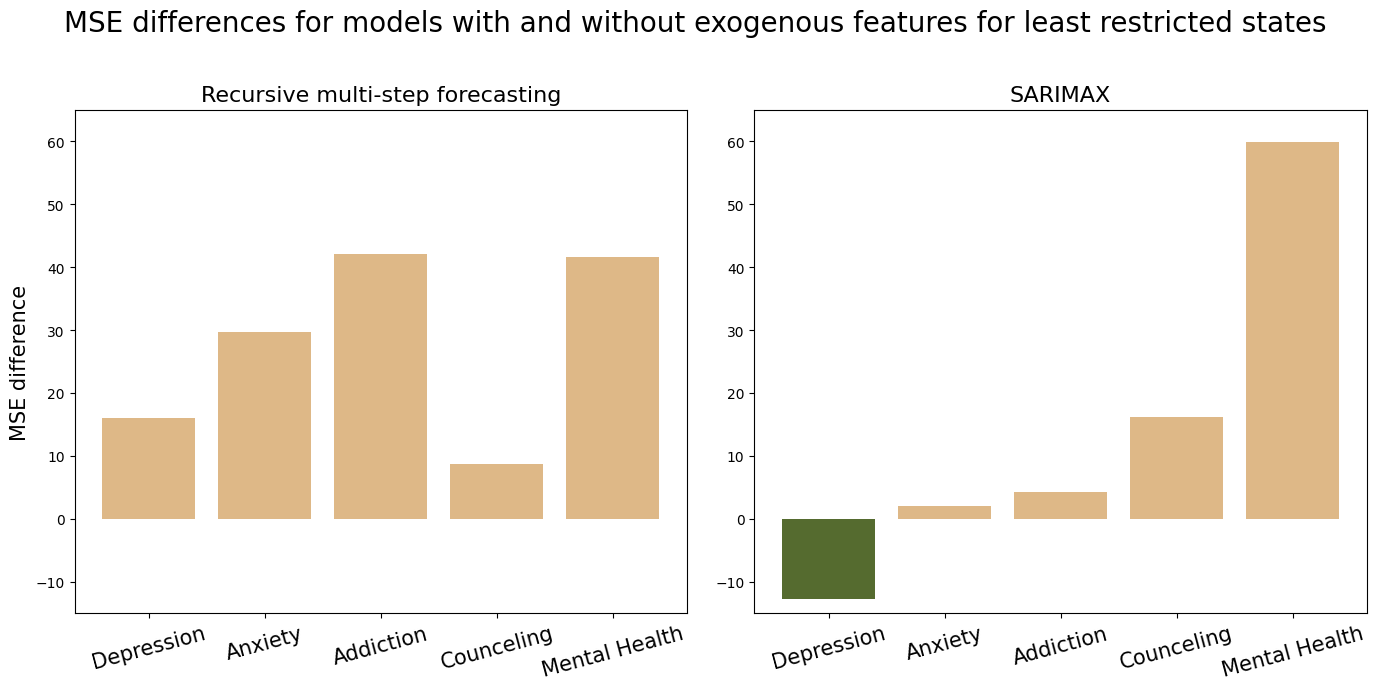

In [16]:
# Differences for Least restricted states
functions.plot_MSE_difference(rf_diff_least, sarima_diff_least, 'least', period=period, ylim = [-15, 65])

---

## Conclusion
At the start of the COVID-19 Restrictions, the Forecasting Conceling searches for the Most Restricted States benefited from adding Exogenous features - COVID Restrictions for both SARIMA and Recursive multi-step forecasting.
Least Restricted states with Recursive multi-step forecasting did not benefit from adding Exogenous features and for SARIMAX only Depression searches MSE score was reduced.